<a href="https://colab.research.google.com/github/sheikh-bah/Deep_NN_-_CNN/blob/main/Rock_paper_scissor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rock Paper Scissors is a dataset containing 2,892 images of diverse hands in Rock/Paper/Scissors poses. It is licensed CC By 2.0 and available for all purposes, but it’s intent is primarily for learning and research.


Each image is 300×300 pixels in 24-bit color


Credit to Laurence Moroney


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-03-09 10:38:10--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   106MB/s    in 1.8s    

2021-03-09 10:38:12 (106 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-03-09 10:38:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()


In [ ]:
training_dir = '/tmp/rps/'
testing_dir = '/tmp/rps-test-set'


rock_dir = os.path.join(training_dir, 'rock')
paper_dir = os.path.join(training_dir, 'paper')
scissor_dir = os.path.join('/tmp/rps/scissors')




In [ ]:
rock_dir_fname = os.listdir(rock_dir)
paper_dir_fname = os.listdir(paper_dir)
scissor_dir_fname = os.listdir(scissor_dir)


print('The number of rock data for training: ', len(rock_dir_fname))
print('The number of paper data for training: ', len(paper_dir_fname))
print('The number of scissor data for training:', len(scissor_dir_fname))


The number of rock data for training:  840
The number of paper data for training:  840
The number of scissor data for training: 840


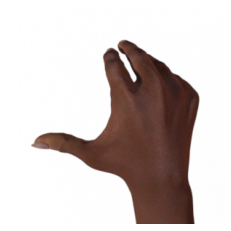

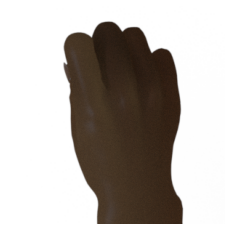

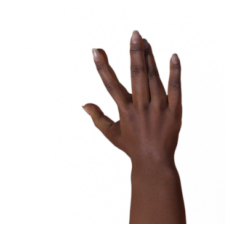

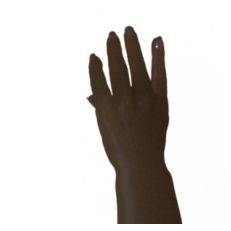

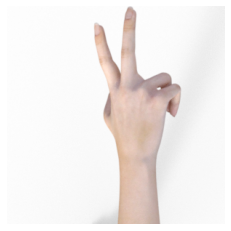

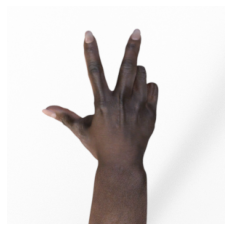

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index_img = 2

rock_img = [os.path.join(rock_dir,fname)
            for fname in rock_dir_fname[index_img - 2: index_img]]

paper_img = [os.path.join(paper_dir, fname)
             for fname in paper_dir_fname[index_img-2: index_img]]

scissor_img = [os.path.join(scissor_dir, fname)
              for fname in scissor_dir_fname[index_img-2: index_img]]


for index, image_path in enumerate(rock_img + paper_img + scissor_img):
  img = mpimg.imread(image_path)
  plt.axis('off')
  plt.imshow(img)
  plt.show()




In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(64, (3,3), input_shape = (300, 300, 3), activation = 'relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(128, (3,3),activation= 'relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(128,(3,3), activation= 'relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(1024, activation= 'relu'),
                                 keras.layers.Dense(3, activation= 'softmax')

])

# pre processing image

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
training_dir = '/tmp/rps/'
testing_dir = '/tmp/rps-test-set'

train_datagen = ImageDataGenerator(
               rescale = 1/255,
               horizontal_flip = True,
               fill_mode = 'nearest',
               rotation_range = 40,
               width_shift_range = 0.2,
               height_shift_range = 0.2,
               zoom_range = 0.2,
               shear_range = 0.2
)

validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
                       training_dir,
                       target_size = (300, 300),
                       batch_size = 126,
                       class_mode = 'categorical'
                       
                       
                       )


validation_generator = validation_datagen.flow_from_directory(
                         testing_dir,
                         target_size = (300, 300),
                         batch_size = 126,
                         class_mode = 'categorical'
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
model.compile( loss='categorical_crossentropy',optimizer= 'rmsprop', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 543s 27s/step - loss: 3.1034 - accuracy: 0.3288 - val_loss: 1.0660 - val_accuracy: 0.4812
Epoch 2/25
20/20 [==============================] - 537s 27s/step - loss: 1.1323 - accuracy: 0.4179 - val_loss: 1.0808 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 547s 27s/step - loss: 1.1433 - accuracy: 0.4516 - val_loss: 0.7227 - val_accuracy: 0.7903
Epoch 4/25
20/20 [==============================] - 547s 27s/step - loss: 0.8785 - accuracy: 0.5756 - val_loss: 0.8508 - val_accuracy: 0.5780
Epoch 5/25
20/20 [==============================] - 543s 27s/step - loss: 1.0051 - accuracy: 0.5245 - val_loss: 0.8137 - val_accuracy: 0.6290
Epoch 6/25
20/20 [==============================] - 544s 27s/step - loss: 0.7902 - accuracy: 0.6587 - val_loss: 0.6793 - val_accuracy: 0.5457
Epoch 7/25
20/20 [==============================] - 553s 28s/step - loss: 0.6604 - accuracy: 0.6978 - val_loss: 0.4630 - val_accuracy: 0.7258
Epoch 

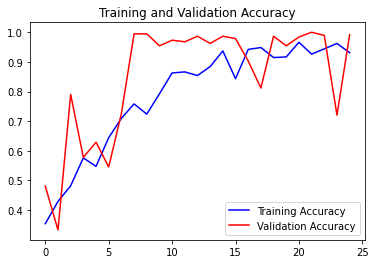

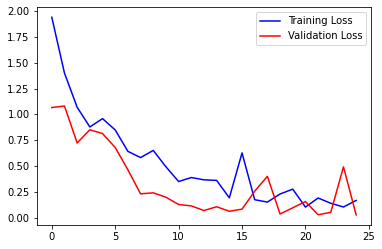

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.legend(loc = 0)
plt.figure()


plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')

plt.legend()
plt.show()


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)


  images = np.vstack([x])
  classes = model.predict(images, batch_size= 10)
  print(fn)
  print(classes)



Saving paper1.png to paper1 (2).png
Saving paper2.png to paper2 (1).png
Saving paper3.png to paper3 (1).png
Saving rock1.png to rock1 (1).png
Saving rock2.png to rock2 (1).png
Saving rock3.png to rock3 (1).png
Saving scissors1.png to scissors1 (1).png
Saving scissors2.png to scissors2 (1).png
Saving scissors3.png to scissors3 (1).png
paper1.png
[[1. 0. 0.]]
paper2.png
[[1. 0. 0.]]
paper3.png
[[0. 0. 1.]]
rock1.png
[[0. 1. 0.]]
rock2.png
[[0. 1. 0.]]
rock3.png
[[0. 1. 0.]]
scissors1.png
[[0. 0. 1.]]
scissors2.png
[[0. 0. 1.]]
scissors3.png
[[0. 0. 1.]]


# when using image generator the classes comes from directories and thus were sorted in alphabetical order.

so the first value is the paper, and then rock and then scissor